# Nettoyage pour Machine Learning : Titanic

Un modèle de machine learning se construit à travers un entrainement sur une jeu de données labélisés, c 'est à dire un jeu de données avec solution.
Le premier objectif est donc d'identifier la variable à prédire puis mettre en forme un maximum de colonne d'observations (variables) pour rendre intelligible ces informations au yeux de notre modèle.
De cette maniere le modèle interprete les correlations de chaque ligne d'observation (variables) avec son réultat la colonne labelisée. 
Ainsi, le modele se calle pour etre capable de donner la bonne valeur pour chacune de ces observations.
Une fois entrainé, ce modèle peut donc prédire le résultation (le label) d'observations non labélisés (sans résultat)

L'objectif de ce notebook est de nettoyer inteligemment ce datastet pour rendre intelligible tous les renseignements cachés dans celui ci et obtenir la meilleur performance du modele de ML associé

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltF
import seaborn as sns
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Chargement des jeux de données et préparation des train/test

In [2]:
train = read_csv('train.csv', header=0)
test = read_csv('test.csv', header=0)

In [3]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
477,478,0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
342,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
757,758,0,2,"Bailey, Mr. Percy Andrew",male,18.0,0,0,29108,11.5000,NaN,S
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S


In [4]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
369,1261,2,"Pallas y Castello, Mr. Emilio",male,29.0,0,0,SC/PARIS 2147,13.8583,NaN,C
171,1063,3,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C
237,1129,3,"Baccos, Mr. Raffull",male,20.0,0,0,2679,7.2250,NaN,C
230,1122,2,"Sweet, Mr. George Frederick",male,14.0,0,0,220845,65.0000,NaN,S
315,1207,3,"Hagardon, Miss. Kate",female,17.0,0,0,AQ/3. 30631,7.7333,NaN,Q


Survived est la colonne à prédire de notre jeu d'entrainement. Chaque ligne correspond à un passager, il s'agit d'une observation. La colonne Survived nous indique si ce passager a survécu ou non au nauffrage du Titanic.

# Analyse du dataset

Survived est la colonne à prédire de notre jeu d'entrainement. Chaque ligne correspond à un passager, il s'agit d'une observation. La colonne Survived nous indique si ce passager a survécu ou non au nauffrage du Titanic.

Analyser les datasets avec par ex .describe(include="all")

In [5]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Balkic, Mr. Cerin",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Premieres remarques sur note jeu de données:

- 891 passagers
- 20% des informations sur leurs ages est manquantes 
- 75% des information cabines sont manquantes

Quel impact du sex sur la chance de survie ?

Percentage de femme ayant survécu: 74.20382165605095
Percentage de homme ayant survécu: 18.890814558058924


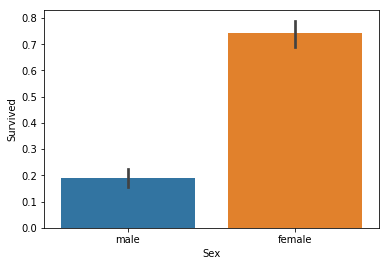

In [6]:
#Dessin d'un bar plot des survivants selon leurs sexe
sns.barplot(x="Sex", y="Survived", data=train)

print("Percentage de femme ayant survécu:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage de homme ayant survécu:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Quel impact de la classe sur la chance de survie ?

Tracer une petite dataViz avec seaborn

Percentage de Pclass = 1 qui a survécu: 62.96296296296296
Percentage de Pclass = 2 qui a survécu: 47.28260869565217
Percentage de Pclass = 3 qui a survécu: 24.236252545824847


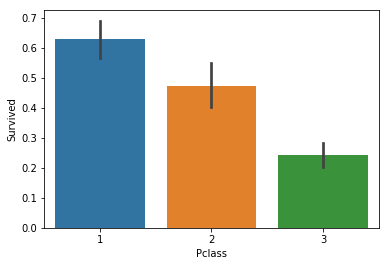

In [7]:
sns.barplot(x="Pclass",y="Survived",data=train)

print("Percentage de Pclass = 1 qui a survécu:",train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage de Pclass = 2 qui a survécu:",train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage de Pclass = 3 qui a survécu:",train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Quel impact de l'age sur la chance de survie ?

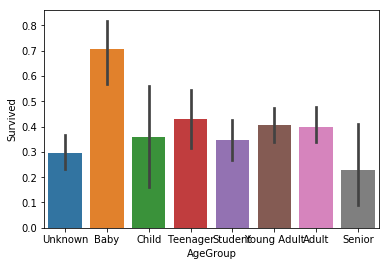

In [8]:
#classer les ages dans catégories
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

# Nettoyage du dataset

Combien de valeurs nulles ?

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup         0
dtype: int64

Notre échantillon d'entrainement est petit, eliminer les Nan et donc la ligne entière reduirait encore plus la taille de notre jeu d'entrainement

Comment conserver l'information de la ligne (observation) malgré ces Nan

In [10]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,Adult
424,425,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,370129,20.2125,NaN,S,Teenager
314,315,0,2,"Hart, Mr. Benjamin",male,43.0,1,1,F.C.C. 13529,26.2500,NaN,S,Adult
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN,Senior
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,Young Adult


Nous pouvons remplacer ces Nan par une valeur defaut ? Ou essayer de le remplacer par une valeur proche de son profil (qualifier par les autre variables)

Comment gérer le nom des personne devons nous tout jeter ou peut etre conserver des informations comme son titre (Mr / Miss / Lord / ... ). Ces informations ont certainement une corrélation avec le target que nous souhaitons prédire (A t il survi ?)

## Colonne cabin

In [11]:
# Eliminons cette colonne. En effet, trop de valeurs sont absentes (> 650)
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

## Colonne ticket 

Eliminons egalement la colonne ticket. En effet quasiment chaque ligne est différente (680)

In [12]:
train = train.drop(['Ticket'],axis=1)
test = test.drop(['Ticket'],axis=1)

## Colonne embarked

In [13]:
print("Nombre de passager ayant embarqué à Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Nombre de passager ayant embarqué à Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Nombre de passager ayant embarqué à Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Nombre de passager ayant embarqué à Southampton (S):
644
Nombre de passager ayant embarqué à Cherbourg (C):
168
Nombre de passager ayant embarqué à Queenstown (Q):
77


Nous remplaçons les valeurs manquantes par S qui represente la majorité des valeurs de cette colonne

In [14]:
train['Embarked'] = train['Embarked'].fillna(value = "S")
test['Embarked'] = test['Embarked'].fillna(value = "S")

## Colonne age

Beaucoup de valeurs sont manquanes nous ne pouvons pas les compléter par une valeur unique. Nous allons essayer de trouver un moyen de réduire le risque lié au remplissage de ces cellules.

In [15]:
#On crée un group de dataset (train et test) pour nettoyer deux dataframes avec les memes opérations
combine = [train, test]

#Extraction des titres dans la colonne nom puis test
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [16]:
#Remplacement de certains titres peu fréquents par un label commun
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.250000
5,Royal,1.000000


mapper chaque titre avec une valeur numérique

In [ ]:
train["Title"] = train["Title"].replace(["Mr"],1)
train["Title"] = train["Title"].replace(["Miss"],2)
train["Title"] = train["Title"].replace(["Mrs"],3)
train["Title"] = train["Title"].replace(["Master"],4)
train["Title"] = train["Title"].replace(["Royal"],5)
train["Title"] = train["Title"].replace(["Rare"],6)

In [17]:
# mapper chaque titre avec une valeur numérique (Correction du prof)
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,1


Mainenant, nous allons essayer d'estimer l'ages des passagers à partir de leurs titres.

In [18]:
# Pour chaque titre prendre l'age le plus commun des passagers
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}



for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [19]:
train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,3


Mapping de chaque group d'age

In [20]:

age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,6,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,5,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,5,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,5,1


In [21]:
# Nous pouvons effacer la colonne age ainsi que la colonne name une fois les informations sur le titre extrait
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [22]:
train.sample(5)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
734,735,0,2,male,0,0,13.0000,S,4,1
776,777,0,3,male,0,0,7.7500,Q,5,1
542,543,0,3,female,4,2,31.2750,S,2,2
890,891,0,3,male,0,0,7.7500,Q,5,1
824,825,0,3,male,4,1,39.6875,S,1,4


## Colonne sex

Mapper les valeurs de la colonne sex

In [23]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,S,4,1
1,2,1,1,1,1,0,71.2833,C,6,3
2,3,1,3,1,0,0,7.9250,S,5,2
3,4,1,1,1,1,0,53.1000,S,5,3
4,5,0,3,0,0,0,8.0500,S,5,1


## Embarked colonne

In [24]:
#mapper les valeurs de la colonne embarked
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,1,4,1
1,2,1,1,1,1,0,71.2833,2,6,3
2,3,1,3,1,0,0,7.9250,1,5,2
3,4,1,1,1,1,0,53.1000,1,5,3
4,5,0,3,0,0,0,8.0500,1,5,1


## Colonne Fare

In [25]:
#Documentation des valeurs manquantes de l'echantillon test
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#Mapper les labels fare en valeurs numeriques
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#Elimination des colonnes
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

/home/coco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


# Check des echantillons Test et Train

In [26]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,1,0,3,0,1,0,1,4,1,1
1,2,1,1,1,1,0,2,6,3,4
2,3,1,3,1,0,0,1,5,2,2
3,4,1,1,1,1,0,1,5,3,4
4,5,0,3,0,0,0,1,5,1,2


In [27]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,892,3,0,0,0,3,5,1,1
1,893,3,1,1,0,1,6,3,1
2,894,2,0,0,0,3,7,1,2
3,895,3,0,0,0,1,5,1,2
4,896,3,1,1,1,1,4,3,2


# Décomposition de l'echantillon train en sous train et sous test

Survived est la colonne à prédire de notre jeu d'entrainement. Chaque ligne correspond à un passager, il s'agit d'une observation. La colonne Survived nous indique si ce passager a survécu ou non au nauffrage du Titanic.

Nous l'appellerons target et nous conserverons egalement l'ID passenger associé

In [28]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]


In [29]:
# Nous gardons 20 %  de notre echantillon train qui est labelisé pour evaluer la performance de notre modele 
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.25, random_state = 0)

# Modélisation / Prédiction

In [30]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

82.51


In [31]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

83.41


In [32]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

81.61


# Creation d'un fichier de soumission Kaggle

In [33]:
#Le fichier de soumission contione un colonne passenger ID et une colonne survie ou non
ids = test['PassengerId']
predictions = randomforest.predict(test.drop('PassengerId', axis=1))

#Construction sous format csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)